In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##pip install numpy

# 1. Reading the image

In [3]:
im = plt.imread('ADD_IMAGE_FILE_HERE') ## Change figure file 
print(im.dtype)
print(im.shape)

uint8
(1080, 1440, 3)


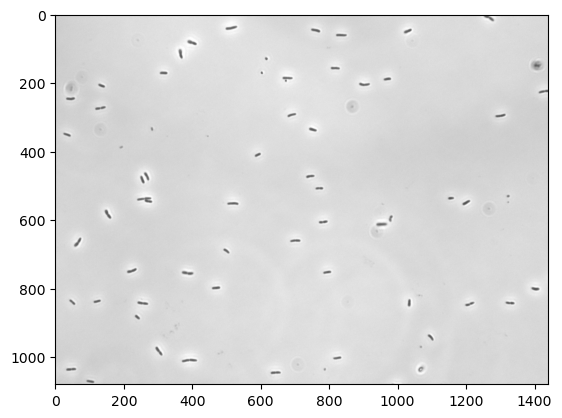

In [4]:
plt.imshow(im)

float64
(1080, 1440)


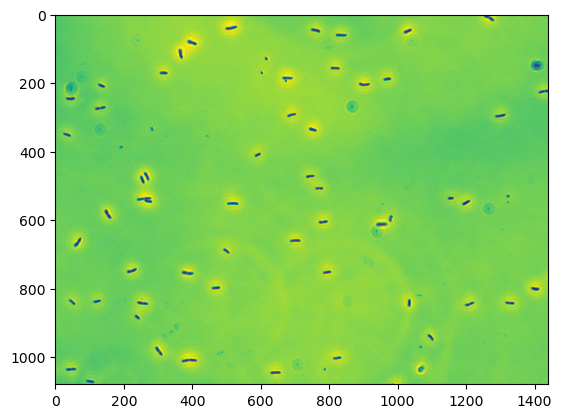

In [5]:
# Load the grayscale image
from skimage.color import rgb2gray

# Convert to grayscale
im_gray = rgb2gray(im)

plt.imshow(im_gray)
print(im_gray.dtype)
print(im_gray.shape)

# 3. Adjust threshold

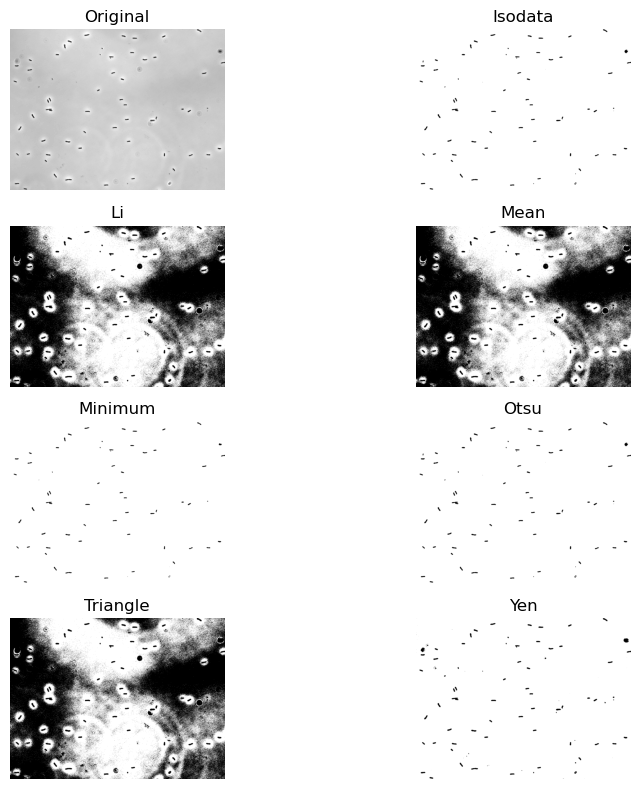

In [6]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(im_gray, figsize=(10, 8), verbose=False)
plt.show()

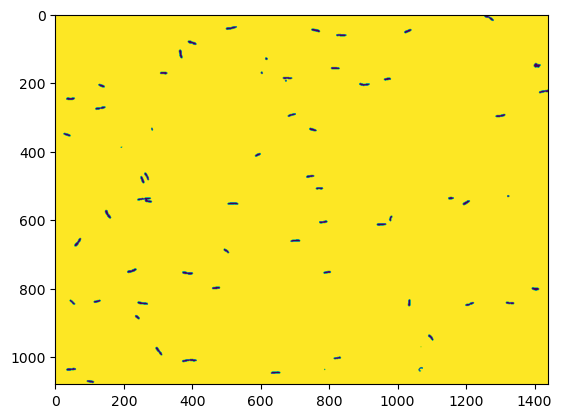

In [7]:
from skimage import io, filters, morphology
from scipy import ndimage
#Apply a threshold to create a binary mask
threshold = filters.threshold_minimum(im_gray)  ## change to filter that works the best: threshold_[filter](im_gray)
binary_mask = im_gray > threshold

plt.imshow(binary_mask)


In [8]:
inverted_mask = 1 - binary_mask

# 4. Measurement and filtering

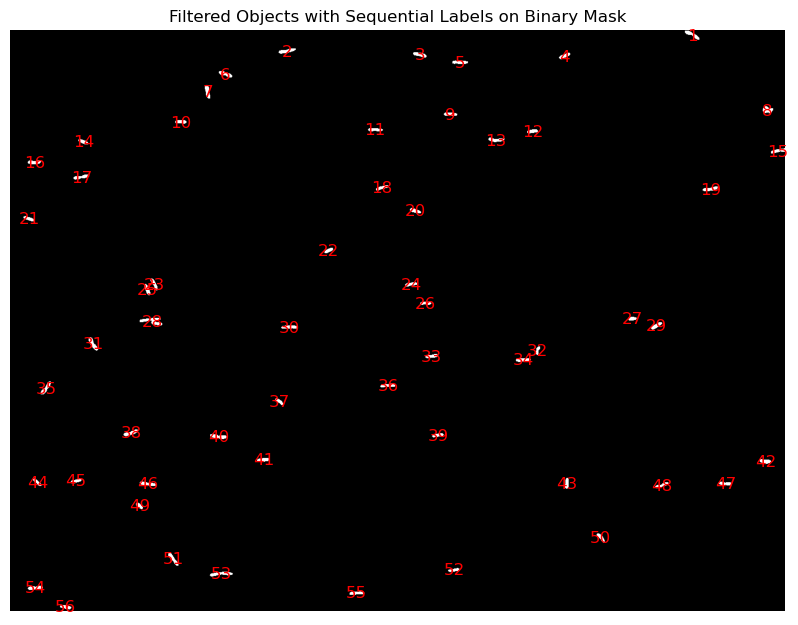

In [9]:
import matplotlib.pyplot as plt
from skimage import measure, morphology
from pandas import DataFrame
import numpy as np

# Assuming binary_mask is the binary mask from the thresholded/smoothed image
labels = measure.label(inverted_mask)
props = measure.regionprops(labels)

# Create a list to store the properties of each labeled region
lr = []
for prop in props:
    # Collect properties for display and filtering
    aa = [prop.label, prop.area, prop.centroid, prop.major_axis_length, prop.minor_axis_length]
    lr.append(aa) 

# Create DataFrame and filter out small objects based on area
Outprops = DataFrame(lr, columns=['Original_Label', 'Area', 'Centroid', 'Length', 'Width'])
df3 = Outprops[Outprops['Area'] > (ADD NUMBER AREA HERE) ]  # Filter out objects with area <= 100 ## Change area size

# Add a new column with sequential labels starting from 1
df3 = df3.reset_index(drop=True)  # Reset index to ensure numbering starts from 0
df3['Adjusted_Label'] = df3.index + 1  # Create a new column for adjusted labels

# Create a new binary mask that includes only the filtered regions
filtered_binary_mask = np.zeros_like(inverted_mask)
for _, row in df3.iterrows():
    original_label_id = row['Original_Label']
    filtered_binary_mask[labels == original_label_id] = 1

# Plot the filtered binary mask with adjusted labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(filtered_binary_mask, cmap='gray')
ax.set_title("Filtered Objects with Sequential Labels on Binary Mask")

# Loop through filtered DataFrame to plot adjusted labels on the filtered mask
for _, row in df3.iterrows():
    centroid = row['Centroid']
    adjusted_label = row['Adjusted_Label']
    # Plot the adjusted label number at the centroid location
    ax.text(centroid[1], centroid[0], str(adjusted_label), color='red', fontsize=12, ha='center', va='center')

plt.axis('off')
plt.savefig('filtered_objects_with_labels.png', bbox_inches='tight', dpi=300)


# 5. Display and save the dataFrame

In [10]:
df3

,Original_Label,Area,Centroid,Length,Width,Adjusted_Label
0,1,172,"(10.104651162790697, 1267.0348837209303)",34.257795,7.241639,1
1,2,180,"(40.34444444444444, 514.0333333333333)",34.879520,6.837215,2
2,3,155,"(47.174193548387095, 761.1935483870968)",27.620137,7.299445,3
3,4,131,"(49.41984732824427, 1030.0916030534352)",23.693268,7.150161,4
4,5,159,"(61.314465408805034, 835.7295597484276)",31.516509,6.553695,5
5,6,162,"(83.25925925925925, 399.9074074074074)",28.454329,7.562270,6
6,7,164,"(115.8170731707317, 366.5548780487805)",27.730531,7.808371,7
7,9,181,"(149.70165745856355, 1407.1823204419888)",19.997252,12.168672,8
8,10,134,"(157.63432835820896, 817.7910447761194)",26.714708,6.429393,9
9,12,122,"(171.7295081967213, 317.1393442622951)",22.701628,6.975886,10


In [11]:
# save as csv, allow user to choose name  ## change file name
df3.to_csv('NEW_FILE_NAME.csv')

# 6. Graphing data from single dataset

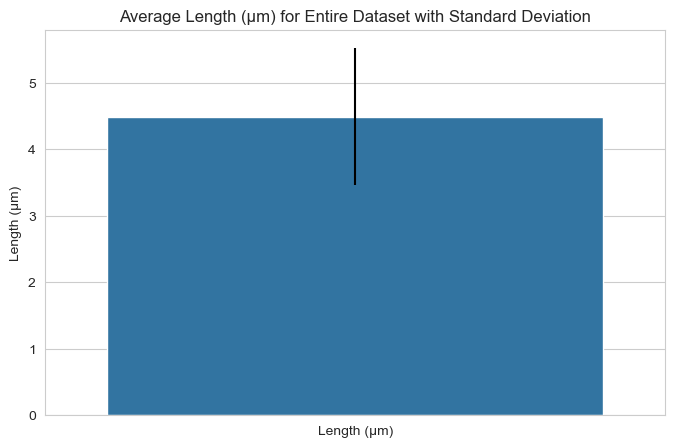

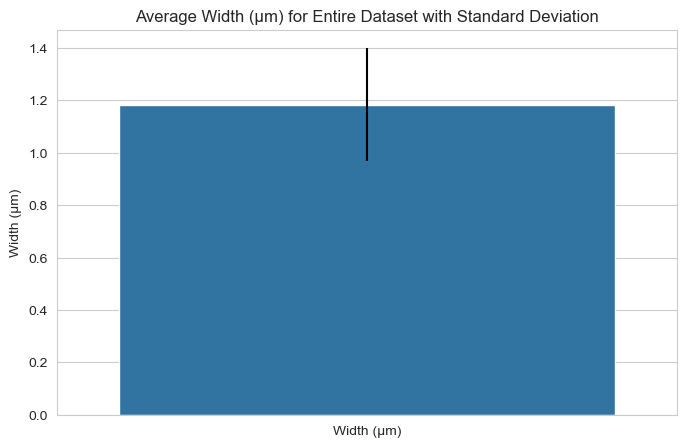

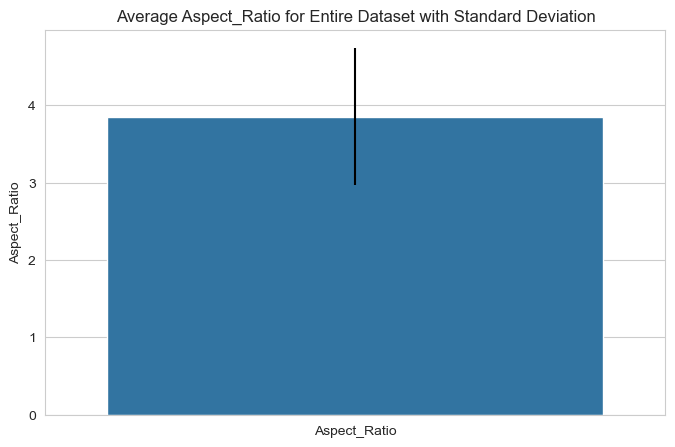

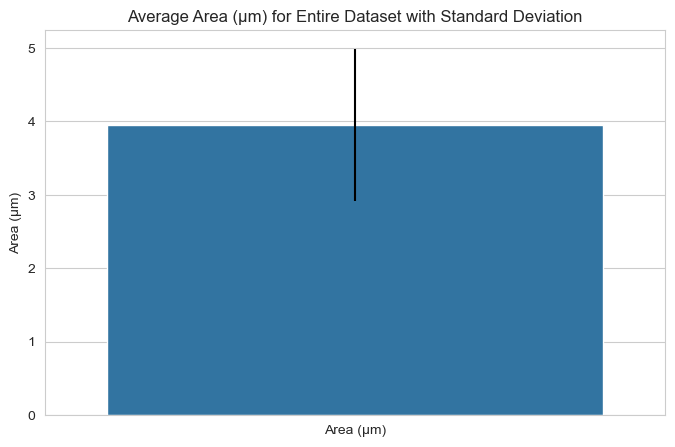

In [12]:
# Compute Aspect Ratio
if 'Length' in df3.columns and 'Width' and 'Area' in df3.columns:
    df3['Aspect_Ratio'] = df3['Length'] / df3['Width']
    df3['Length (μm)'] = df3['Length'] / 6 # Depends on lens used. Our x40 lens is 6 pixels per micron
    df3['Width (μm)'] = df3['Width'] / 6 # Depends on lens used. Our x40 lens is 6 pixels per micron
    df3['Area (μm)'] = df3['Area'] / 6 **2 # Depends on lens used. Our x40 lens is 6 pixels per micron

# Define the features to plot
features = ['Length (μm)', 'Width (μm)', 'Aspect_Ratio', 'Area (μm)']

# Compute overall mean and standard deviation values
mean_values = df3[features].mean()
std_values = df3[features].std()

# Set style
sns.set_style("whitegrid")

# Create separate plots
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=[feature], y=[mean_values[feature]], yerr=[std_values[feature]], capsize=0.2)
    plt.title(f'Average {feature} for Entire Dataset with Standard Deviation')
    plt.ylabel(f'{feature.replace("Mean ", "")}')
    plt.savefig(f"{feature.replace(' ', '_').lower()}_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.show()